In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import os

In [70]:
img = cv2.imread("kpi_122522_10.jpg")
gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

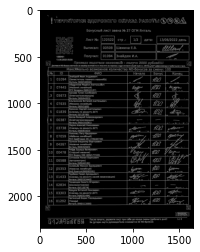

In [71]:
canny = cv2.Canny(gr, 10, 250)
plotting = plt.imshow(canny,cmap='gray')
plt.show()

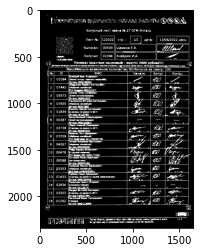

In [72]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
plotting = plt.imshow(closed,cmap='gray')
plt.show()

In [20]:
def find_table(path):
    img = cv2.imread(f"pics/{path}")
    print(img)
    gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gr, 10, 250)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
    contours = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1]
    for cont in contours:
            #сглаживание и определение количества углов
            sm = cv2.arcLength(cont, True)
            apd = cv2.approxPolyDP(cont, 0.02*sm, True)
            #выделение контуров
            if len(apd) == 4:
                cv2.drawContours(img, [apd], -1, (0,255,0), 4)
    num = path.split('_')[1]
    cv2.imwrite(f'output_{num}.jpg', img)

In [27]:
# images = os.listdir("pics/")
# print(len(images))
# for i in range(len(images)-2):
#     find_table(images[i])
find_table("kpi_123740_1.jpg")

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
